In [3]:
import pandas as pd #import libraries
import matplotlib.pyplot as plt
import numpy as np

In [4]:
train_features = pd.read_csv('train_features.csv') #import data features
train_targets_scored = pd.read_csv('train_targets_scored.csv') #import data targets


In [5]:
vals = train_targets_scored.sum()[1:].sort_values() #Sum of targets
vals = pd.DataFrame(data = vals, columns = ['Sum of Targets'])
pd.set_option('display.max_columns', 10) 
vals

,Sum of Targets
atp-sensitive_potassium_channel_antagonist,1
erbb2_inhibitor,1
diuretic,6
autotaxin_inhibitor,6
protein_phosphatase_inhibitor,6
...,...
serotonin_receptor_antagonist,404
dopamine_receptor_antagonist,424
cyclooxygenase_inhibitor,435
proteasome_inhibitor,726


In [6]:
train_targets_scored.head() #tabular Visualization of the targets

,sig_id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,...,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,0,0,0,0,...,0,0,0,0,0
1,id_000779bfc,0,0,0,0,...,0,0,0,0,0
2,id_000a6266a,0,0,0,0,...,0,0,0,0,0
3,id_0015fd391,0,0,0,0,...,0,0,0,0,0
4,id_001626bd3,0,0,0,0,...,0,0,0,0,0


In [7]:
train_features.cp_type.value_counts()
#ctl_vehicle will be removed as it is has no targets

trt_cp         21948
ctl_vehicle     1866
Name: cp_type, dtype: int64

In [8]:
train_features.cp_time.value_counts() #id count per hours

48    8250
72    7792
24    7772
Name: cp_time, dtype: int64

In [9]:
train_features.cp_dose.value_counts()  #id count per dose

D1    12147
D2    11667
Name: cp_dose, dtype: int64

In [10]:
train_features[train_features['cp_type'].str.contains('ctl_vehicle')]  

,sig_id,cp_type,cp_time,cp_dose,g-0,...,c-95,c-96,c-97,c-98,c-99
25,id_0054388ec,ctl_vehicle,48,D1,-0.6696,...,0.5573,0.8837,0.5534,0.8976,1.0050
38,id_0079af0fb,ctl_vehicle,24,D1,-0.1636,...,-0.1319,0.2187,0.0737,0.6498,-1.4820
40,id_007bfbb91,ctl_vehicle,24,D2,-1.3200,...,0.2636,-0.5751,0.3362,0.8543,0.9180
47,id_008a986b7,ctl_vehicle,48,D2,0.4860,...,-0.3694,-0.4979,0.5281,-0.9245,-0.9367
63,id_009d8340f,ctl_vehicle,24,D2,0.4471,...,-0.0435,0.0949,0.2000,-0.4326,0.9364
...,...,...,...,...,...,...,...,...,...,...,...
23729,id_ff1f9e5fc,ctl_vehicle,24,D1,0.0465,...,-0.0074,0.2131,-0.1419,-0.2422,0.0457
23747,id_ff469c482,ctl_vehicle,72,D1,-0.6204,...,0.6224,-0.9630,0.8872,-0.0742,-0.6777
23768,id_ff89331ca,ctl_vehicle,72,D2,-0.1051,...,0.6951,0.9517,-0.8110,-0.1748,-0.3626
23793,id_ffd26f361,ctl_vehicle,48,D2,0.6008,...,0.0504,0.8813,0.7757,-0.5272,0.7082


# Sum of Targets

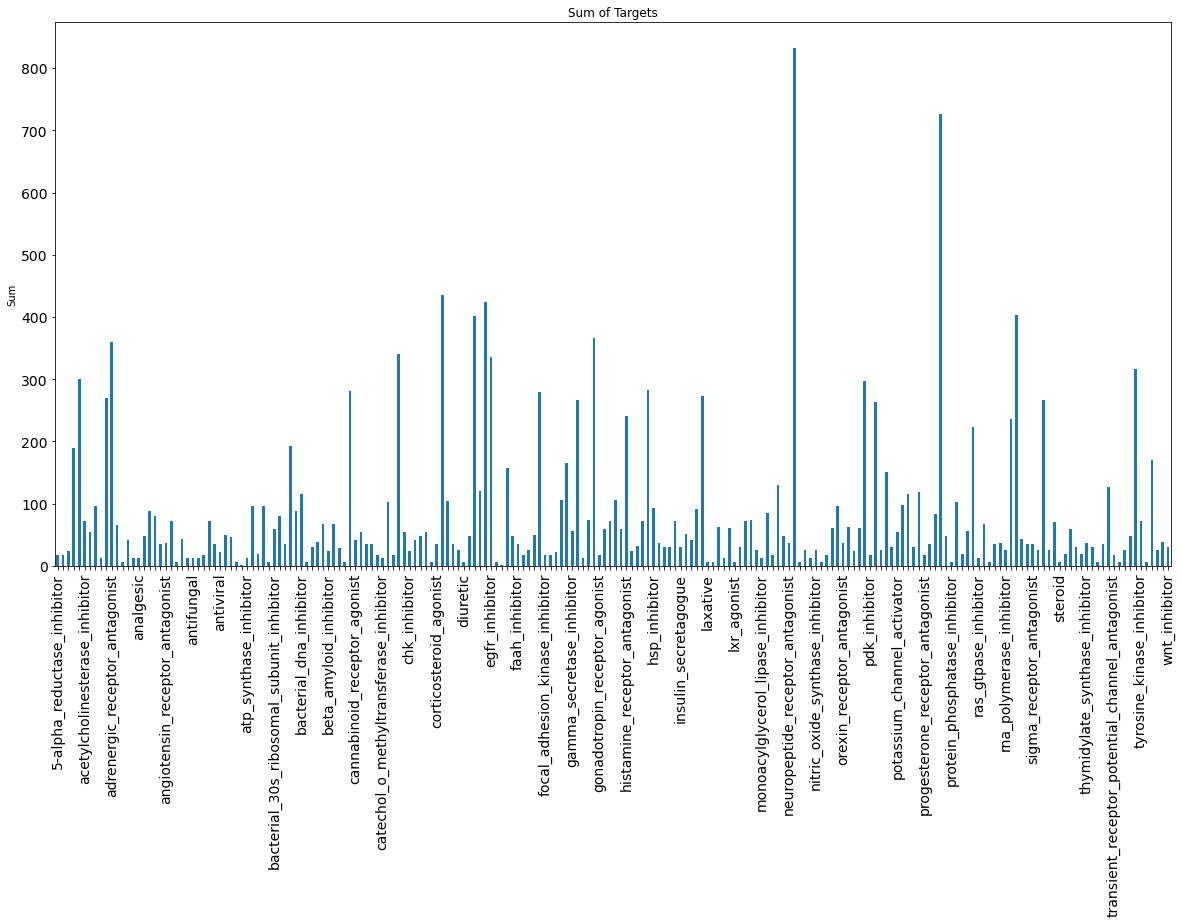

In [13]:
ax = train_targets_scored.sum(axis = 0).iloc[1:].plot.bar(figsize=(20,10), title = "Sum of Targets")
for i, t in enumerate(ax.get_xticklabels()):
    if (i % 5) != 0:
        t.set_visible(False)
ax.set_ylabel("Sum")
ax.tick_params(axis='y', labelsize=14)
ax.tick_params(axis='x', labelsize=14)
plt.savefig('Sum_Of_Targets.pdf')  

# General Distribtuion

In [14]:
Genes = train_features.iloc[:,4:775] #Only Gene Values

In [15]:
Cells = train_features.iloc[:,776:876] #Only Cell Values

In [16]:
GeneSum = np.sum(Genes, axis = 1)#Engineer features
CellSum = np.sum(Cells, axis = 1)
Genemax = np.max(Genes, axis = 1)
Cellmax = np.max(Cells, axis = 1)
Genemin = np.min(Genes, axis = 1)
Cellmin = np.min(Cells, axis = 1)
Genemean = np.mean(Genes, axis = 1)
Cellmean = np.average(Cells, axis = 1)
Genestd = np.std(Genes, axis = 1)
Cellstd = np.std(Cells, axis = 1)

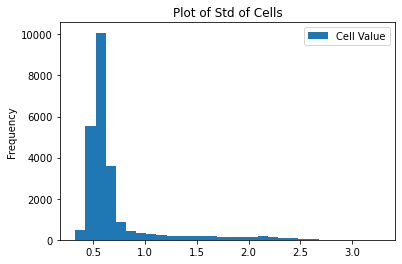

In [17]:
Cellstd = pd.DataFrame(data=Cellstd, columns=['Cell Value'])
Cellstd.plot.hist( bins = 30,title = "Plot of Std of Cells")
plt.savefig('Plot of Std of Cells.pdf')

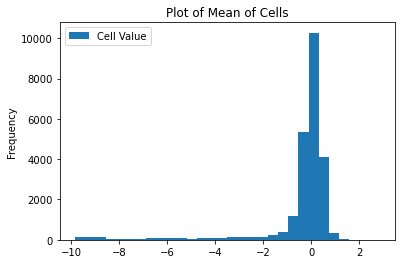

In [18]:
Cellmean = pd.DataFrame(data=Cellmean, columns=['Cell Value'])
Cellmean.plot.hist(bins = 30, title = "Plot of Mean of Cells")
plt.savefig('Plot of Mean of Cells.pdf')

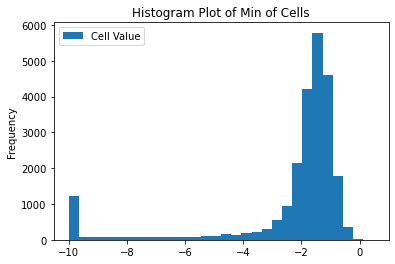

In [19]:
Cellmin = pd.DataFrame(data=Cellmin, columns=['Cell Value'])
Cellmin.plot.hist( bins = 30,title = "Histogram Plot of Min of Cells")
plt.savefig('Plot of Min of Cells.pdf')

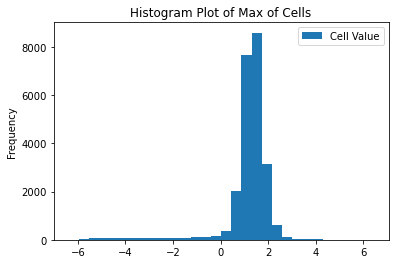

In [20]:
Cellmax = pd.DataFrame(data=Cellmax, columns=['Cell Value'])
Cellmax.plot.hist( bins = 30,title = "Histogram Plot of Max of Cells")
plt.savefig('Plot of Max of Cells.pdf')

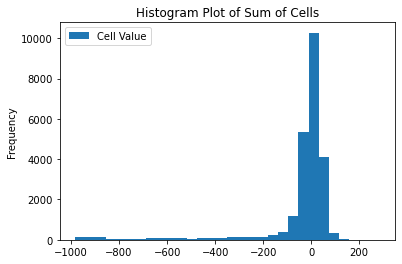

In [21]:
CellSum = pd.DataFrame(data=CellSum, columns=['Cell Value'])
CellSum.plot.hist( bins = 30,title = "Histogram Plot of Sum of Cells")
plt.savefig('Plot of Sum of Cells.pdf')

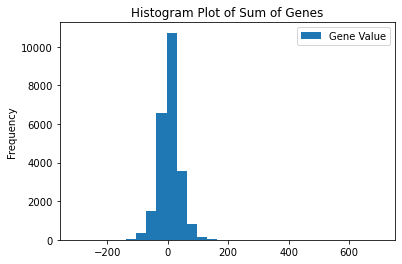

In [22]:
GeneSum = pd.DataFrame(data=GeneSum, columns=['Gene Value'])
GeneSum.plot.hist( bins = 30,title = "Histogram Plot of Sum of Genes")
plt.savefig('Plot of Sum of Genes.pdf')

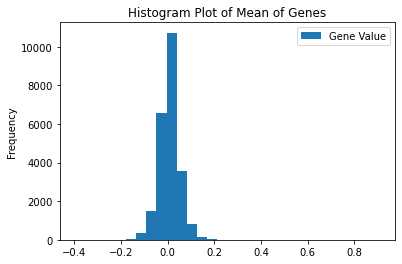

In [23]:
Genemean = pd.DataFrame(data=Genemean, columns=['Gene Value'])
Genemean.plot.hist( bins = 30,title = "Histogram Plot of Mean of Genes")
plt.savefig('Plot of Mean of Genes.pdf')

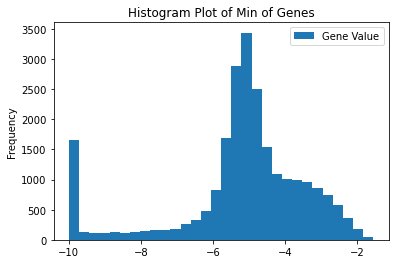

In [24]:
Genemin = pd.DataFrame(data=Genemin, columns=['Gene Value'])
Genemin.plot.hist( bins = 30,title = "Histogram Plot of Min of Genes")
plt.savefig('Plot of Min of Genes.pdf')

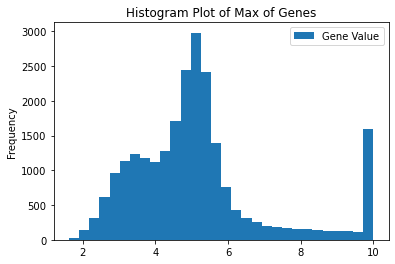

In [25]:
Genemax = pd.DataFrame(data=Genemax, columns=['Gene Value'])
Genemax.plot.hist( bins = 30,title = "Histogram Plot of Max of Genes")
plt.savefig('Plot of Max of Genes.pdf')

In [23]:
Cellmean = np.average(Cells, axis = 1)
for i in range(0,len(Cellmean)): #find id's with low means so they can be visualize in next steps
    if Cellmean[i] < -9.8:
        print(i)

1021
7034
9588
10399
18553
20508


# Individual Plots

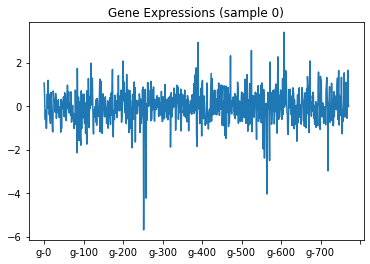

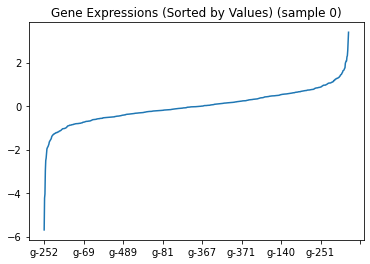

In [31]:
# gene_expression values for 1st sample
train_features.iloc[0, 4:4+772].plot()
plt.title('Gene Expressions (sample 0)')
plt.savefig('GeneExpressions0.pdf')
plt.show()


# Sorted gene_feature values for 1st sample
train_features.iloc[0, 4:4+772].sort_values().plot()
plt.title('Gene Expressions (Sorted by Values) (sample 0)')
plt.savefig('GeneExpressions0Sorted.pdf')
#plt.show()


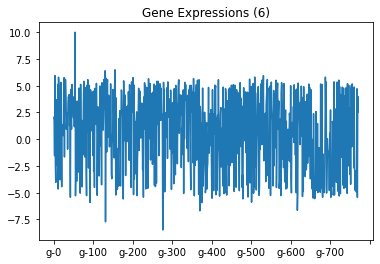

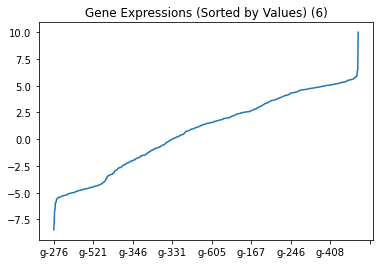

In [33]:
# Checking progression of gene_expressions values

# gene_expression values for 6th sample
train_features.iloc[6, 4:4+772].plot()
plt.title('Gene Expressions (6)')
plt.savefig('GeneExpressionscsd6.pdf')
plt.show()

# Sorted gene_feature values for 6th sample
train_features.iloc[6, 4:4+772].sort_values().plot()
plt.title('Gene Expressions (Sorted by Values) (6)')
plt.savefig('GeneExpressions6Sorted.pdf')
plt.show()

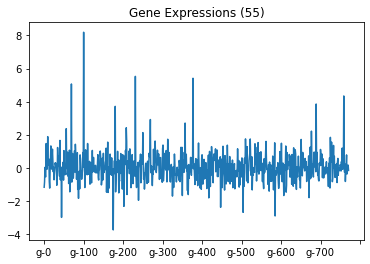

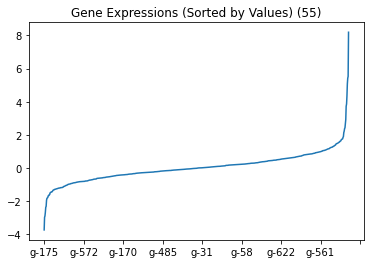

In [34]:
# Checking progression of gene_expressions values

# gene_expression values for 55th sample
train_features.iloc[55, 4:4+772].plot()
plt.title('Gene Expressions (55)')
plt.savefig('GeneExpressions55.pdf')
plt.show()

# Sorted gene_feature values for 55th sample
train_features.iloc[55, 4:4+772].sort_values().plot()
plt.title('Gene Expressions (Sorted by Values) (55)')
plt.savefig('GeneExpressions55Sorted.pdf')
plt.show()

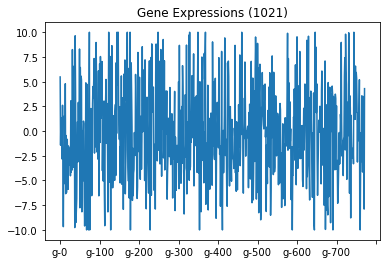

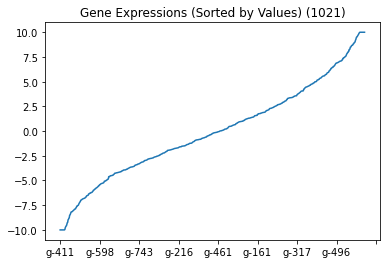

In [35]:
# Checking progression of gene_expressions values

# gene_expression values for 1021st sample
train_features.iloc[1021, 4:4+772].plot()
plt.title('Gene Expressions (1021)')
plt.savefig('GeneExpressions1021.pdf')
plt.show()

# Sorted gene_feature values for 1021st sample
train_features.iloc[1021, 4:4+772].sort_values().plot()
plt.title('Gene Expressions (Sorted by Values) (1021)')
plt.savefig('GeneExpressions1021Sorted.pdf')
plt.show()

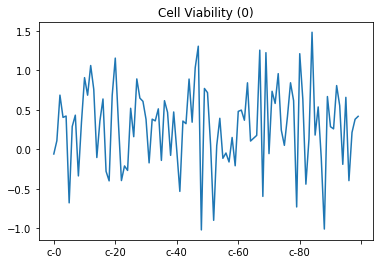

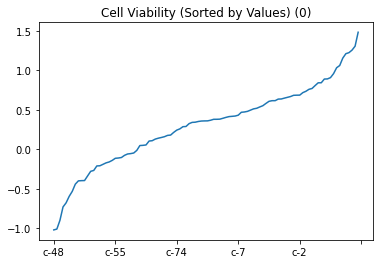

In [44]:
# Checking progression of cell viability values

# cell viability values for 1st sample
train_features.iloc[0, 4+772:].plot()
plt.title('Cell Viability (0)')
plt.savefig('CellViability1.pdf')
plt.show()

# Sorted gene_feature values for 1st sample
train_features.iloc[0, 4+772:].sort_values().plot()
plt.title('Cell Viability (Sorted by Values) (0)')
plt.savefig('CellViability1Sorted.pdf')
plt.show()

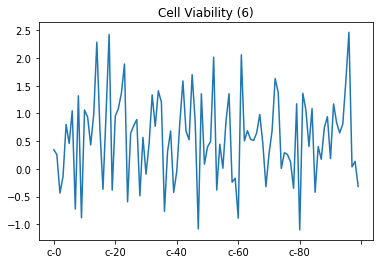

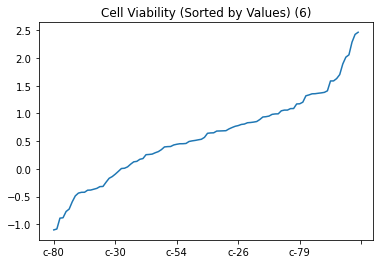

In [45]:
# Checking progression of cell viability values

# cell viability values for 6th sample
train_features.iloc[6, 4+772:].plot()
plt.title('Cell Viability (6)')
plt.savefig('CellViability6.pdf')
plt.show()

# Sorted gene_feature values for 6th sample
train_features.iloc[6, 4+772:].sort_values().plot()
plt.title('Cell Viability (Sorted by Values) (6)')
plt.savefig('CellViability6Sorted.pdf')
plt.show()

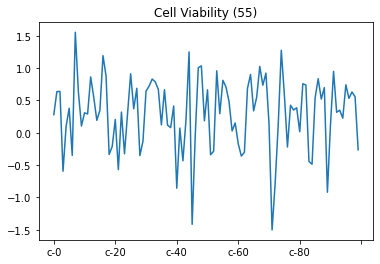

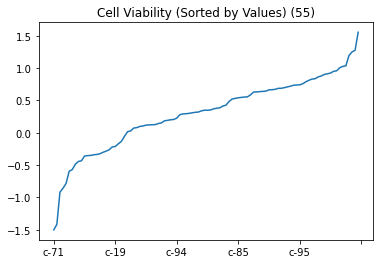

In [46]:
# Checking progression of cell viability values

# cell viability values for 55th sample
train_features.iloc[55, 4+772:].plot()
plt.title('Cell Viability (55)')
plt.savefig('CellViability55.pdf')
plt.show()

# Sorted gene_feature values for 55th sample
train_features.iloc[55, 4+772:].sort_values().plot()
plt.title('Cell Viability (Sorted by Values) (55)')
plt.savefig('CellViability55Sorted.pdf')
plt.show()

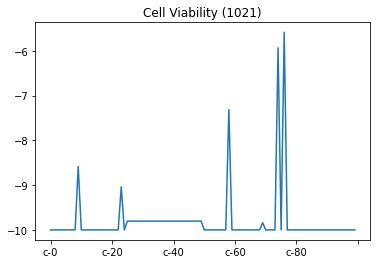

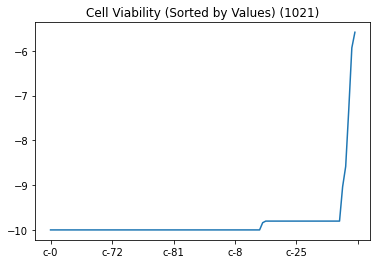

In [47]:
# Checking progression of cell viability values

# cell viability values for 1021st sample
train_features.iloc[1021, 4+772:].plot()
plt.title('Cell Viability (1021)')
plt.savefig('CellViability1021.pdf')
plt.show()

# Sorted gene_feature values for 1021st sample
train_features.iloc[1021, 4+772:].sort_values().plot()
plt.title('Cell Viability (Sorted by Values) (1021)')
plt.savefig('CellViability1021Sorted.pdf')
plt.show()

# Distribution Plots

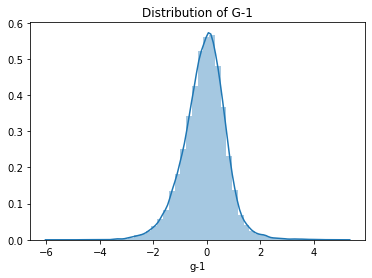

In [36]:
import seaborn as sns
sns.distplot(train_features.loc[:, 'g-1']).set_title("Distribution of G-1")
plt.savefig('G-1Distribution.pdf')

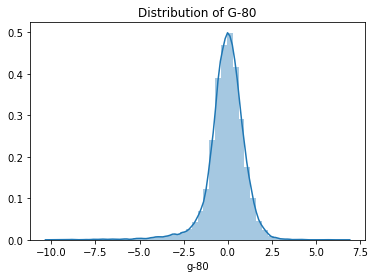

In [37]:
sns.distplot(train_features.loc[:, 'g-80']).set_title("Distribution of G-80")
plt.savefig('G-80Distribution.pdf')

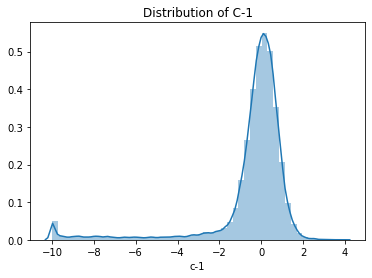

In [38]:
sns.distplot(train_features.loc[:, 'c-1']).set_title("Distribution of C-1")
plt.savefig('C-1Distribution.pdf')

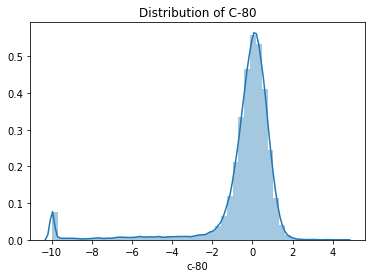

In [39]:
sns.distplot(train_features.loc[:, 'c-80']).set_title("Distribution of C-80")
plt.savefig('C-80Distribution.pdf')